In [1]:
import ipywidgets as widgets
from vidHandlr import *
from alldata_20131031 import *
from dataHandlr import *
from IPython.display import display
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib ipympl

In [2]:
import tempfile
import ipywidgets as widgets
import imageio
import base64
import os

def make_gif(frames):
    #frames is a list of numpy arrays
    images = frames
    temp = tempfile.mktemp(suffix='.gif')
    imageio.mimsave(temp, images)  
    im = widgets.Image(value=open(temp, 'rb').read())
    os.unlink(temp)
    return im


In [3]:
data = loadSingleFrog('AC01_04')

In [4]:
vid = vidHandlr(data['fn'])

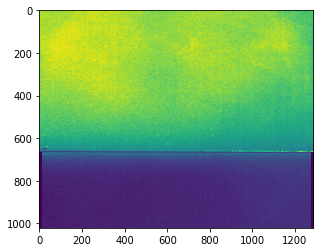

In [5]:
plt.imshow(vid.get_frame(0, 'gray'))

In [3]:
from skimage.transform import resize, rotate
from time import sleep


def show_vid(name):
    global vid, cur_Idx, data, ax, im1, im2, switch
    data = loadSingleFrog(name)
    
    fig, ax = plt.subplots(ncols=3, figsize=(9, 3))
    for vx in ax:
        vx.axis('off')
    
    
    vid = vidHandlr(data['fn'])
    p_button = widgets.Button(description="Previous")
    s_button = widgets.Button(description='Swap')
    n_button = widgets.Button(description='Next')
    display(p_button, s_button, n_button)
    cur_Idx  = 0
    def get_frames(Idx):
        global vid, data, ax
        
        frame = data['frameno'][Idx]
        cx = int(data['mntx'][Idx])
        cy = int(data['o_mnty'][Idx])
        ang =  data['mnta'][Idx]
        
        
        
        
        if  cx - 150 < 0:
            xbl = 0
            xbh = 300
        elif cx + 150 > vid.width:
            xbl = vid.width - 300
            xbh = vid.width
        else:
            xbl = cx - 150
            xbh = cx + 150
        if cy - 150 < 0:
            ybl = 0
            ybh = 300
        elif cy + 150 > vid.height:
            ybl = vid.height - 300
            ybh = vid.height
        else:
            ybl = cy - 150
            ybh = cy + 150
        
        im1 = vid.get_frame(frame, 'RGB')[ybl:ybh, xbl:xbh]
        #im1 = cv2.rectangle(im1, (cx, cy), (cx + 150, cy + 150), 255, 3)
        im2 = vid.get_frame(frame + 1, 'RGB')[ybl:ybh, xbl:xbh]
        #display(make_gif([im1, im2]))
        return im1, im2
        #ani = ax.imshow(im1, cmap='gray', animated=True)
        #f = BytesIO()
        #Image.fromarray(im1).save(f, 'png')
        #display(widgets.Image(value=f.getvalue()))
              
    im1, im2 = get_frames(cur_Idx)
    switch = True
    ax[0].imshow(im1)
    ax[1].imshow(im1)
    ax[2].imshow(im2)
    
    ax[0].set_title(data['frameno'][cur_Idx])
    ax[1].set_title(data['frameno'][cur_Idx])
    ax[2].set_title(data['frameno'][cur_Idx + 1])
    
    def next_click(b):
        global cur_Idx, data, ax, im1, im2
        if cur_Idx + 1 < len(data['frameno']):
            cur_Idx  = cur_Idx + 1
            im1, im2 = get_frames(cur_Idx)
            ax[0].imshow(im1)
            ax[1].imshow(im1)
            ax[2].imshow(im2)
            ax[0].set_title(data['frameno'][cur_Idx])
            ax[1].set_title(data['frameno'][cur_Idx])
            ax[2].set_title(data['frameno'][cur_Idx + 1])
    def prev_click(b):
        global cur_Idx, data, ax, im1, im2
        if cur_Idx - 1 > 0:
            cur_Idx  = cur_Idx + 1
            im1, im2 = get_frames(cur_Idx)
            ax[0].imshow(im1)
            ax[1].imshow(im1)
            ax[2].imshow(im2)
            ax[0].set_title(data['frameno'][cur_Idx])
            ax[1].set_title(data['frameno'][cur_Idx])
            ax[2].set_title(data['frameno'][cur_Idx + 1])
            
    def swap_click(b):
        global cur_Idx, data, ax, im1, im2, switch
        if switch:
            ax[1].imshow(im2)
            ax[1].set_title(data['frameno'][cur_Idx + 1])
        else:
            ax[1].imshow(im1)
            ax[1].set_title(data['frameno'][cur_Idx])
        switch = not switch

    p_button.on_click(prev_click)
    n_button.on_click(next_click)
    s_button.on_click(swap_click)
    



        

In [9]:
show_vid('AC01_04')

FigureCanvasNbAgg()

Button(description='Previous', style=ButtonStyle())

Button(description='Swap', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

In [27]:
global frames
frames = [vid.get_frame(0, 'RGB'), vid.get_frame(2, 'RGB'), vid.get_frame(3, 'RGB'), vid.get_frame(4, 'RGB')]

import tempfile
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import imageio
import base64
import os
def make_gif_triptych():
    global frames
    images = []
    for array in frames[-2:]:
        images.append(array)
    temp = tempfile.mktemp(suffix='.gif')
    imageio.mimsave(temp, images)
    gif_b64 = base64.b64encode(open(temp, 'rb').read()).decode('utf-8')
    url = 'data:image/gif;base64,' + str(gif_b64)
    temp1 = tempfile.mktemp(suffix='.gif')    
    temp2 = tempfile.mktemp(suffix='.gif')    

    imageio.imsave(temp1, images[0])
    imageio.imsave(temp2, images[1])

    gif1_b64 = base64.b64encode(open(temp1, 'rb').read()).decode('utf-8')
    gif2_b64 = base64.b64encode(open(temp2, 'rb').read()).decode('utf-8')
    
    url1 = 'data:image/gif;base64,' + str(gif1_b64)
    url2 = 'data:image/gif;base64,' + str(gif2_b64)
       
   
    html = widgets.HTML('<table><tr><td><img src="{}" /></td><td><img src="{}" /></td><td><img src="{}" /></td></tr></table>'.format(url1, url, url2))
    #image = widgets.Image(value=open(temp).read())
    os.unlink(temp)
    os.unlink(temp1)
    os.unlink(temp2)
   
    return html
#interact(make_gif_triptych, a =widgets.IntSlider(1,5))
global triptych
triptych = make_gif_triptych()

def clip_and_update(x):
    global triptych
    frames.pop()
    triptych.close()
    triptych = make_gif_triptych()
    display(triptych)
   

button1 = widgets.Button(description="extension")
button2 = widgets.Button(description="retraction")
button3 = widgets.Button(description="extension")
button4 = widgets.Button(description="retraction")
button1.on_click(clip_and_update)
button2.on_click(clip_and_update)
button3.on_click(clip_and_update)
button4.on_click(clip_and_update)


display(widgets.VBox([widgets.HBox([button1,button2,button3,button4]),triptych]))

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhBwX9A4cAAPvETvrATvy+T/O+Tvu8Vfu8R/C8Tfq6Vfm…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhBwX9A4cAAP3BTfTAS/a8TPm6TO66S/i4U/i5Rey4S/a…

IndexError: list index out of range

In [37]:
from skimage.transform import resize, rotate
from time import sleep

def make_gif_triptych(im1, im2):
    images = [im1, im2]
    temp = tempfile.mktemp(suffix='.gif')
    imageio.mimsave(temp, images)
    gif_b64 = base64.b64encode(open(temp, 'rb').read()).decode('utf-8')
    url = 'data:image/gif;base64,' + str(gif_b64)
    temp1 = tempfile.mktemp(suffix='.gif')    
    temp2 = tempfile.mktemp(suffix='.gif')    

    imageio.imsave(temp1, images[0])
    imageio.imsave(temp2, images[1])

    gif1_b64 = base64.b64encode(open(temp1, 'rb').read()).decode('utf-8')
    gif2_b64 = base64.b64encode(open(temp2, 'rb').read()).decode('utf-8')
    
    url1 = 'data:image/gif;base64,' + str(gif1_b64)
    url2 = 'data:image/gif;base64,' + str(gif2_b64)
       
   
    html = widgets.HTML('<table><tr><td><img src="{}" /></td><td><img src="{}" /></td><td><img src="{}" /></td></tr></table>'.format(url1, url, url2))
    #image = widgets.Image(value=open(temp).read())
    os.unlink(temp)
    os.unlink(temp1)
    os.unlink(temp2)
   
    return html

def show_vid(name):
    global vid, cur_Idx, data, ax, im1, im2
    global triptych
    
    data = loadSingleFrog(name)
      
    
    vid = vidHandlr(data['fn'])
    p_button = widgets.Button(description="Previous")
    n_button = widgets.Button(description='Next')
    

    cur_Idx  = 0
    def get_frames(Idx):
        global vid, data


        
        frame = data['frameno'][Idx]
        cx = int(data['mntx'][Idx])
        cy = int(data['o_mnty'][Idx])
        ang =  data['mnta'][Idx]      
        
        if  cx - 150 < 0:
            xbl = 0
            xbh = 300
        elif cx + 150 > vid.width:
            xbl = vid.width - 300
            xbh = vid.width
        else:
            xbl = cx - 150
            xbh = cx + 150
        if cy - 150 < 0:
            ybl = 0
            ybh = 300
        elif cy + 150 > vid.height:
            ybl = vid.height - 300
            ybh = vid.height
        else:
            ybl = cy - 150
            ybh = cy + 150
        
        im1 = vid.get_frame(frame, 'RGB')[ybl:ybh, xbl:xbh]
        #im1 = cv2.rectangle(im1, (cx, cy), (cx + 150, cy + 150), 255, 3)

        im2 = vid.get_frame(frame + 1, 'RGB')[ybl:ybh, xbl:xbh]
        #display(make_gif([im1, im2]))
        return im1, im2
        #ani = ax.imshow(im1, cmap='gray', animated=True)
        #f = BytesIO()
        #Image.fromarray(im1).save(f, 'png')
        #display(widgets.Image(value=f.getvalue()))
              
    im1, im2 = get_frames(cur_Idx)
    
    triptych = make_gif_triptych(im1, im2)
    
    def next_click(b):
        global cur_Idx, data, im1, im2, triptych
        if cur_Idx + 1 < len(data['frameno']):
            cur_Idx  = cur_Idx + 1
            im1, im2 = get_frames(cur_Idx)
            triptych.close()
            triptych = make_gif_triptych(im1, im2)
            display(triptych)

    def prev_click(b):
        global cur_Idx, data, im1, im2, triptych
        if cur_Idx - 1 > 0:
            cur_Idx  = cur_Idx + 1
            im1, im2 = get_frames(cur_Idx)
            triptych.close()
            triptych = make_gif_triptych(im1, im2)
            display(triptych)
            


    p_button.on_click(prev_click)
    n_button.on_click(next_click)
    display(widgets.VBox([widgets.HBox([p_button, n_button]),triptych]))

    

In [38]:
show_vid('AC01_04')

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAOCwQtusQturQ9qqQ96oRNSoQdymStymPNS…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAOixSOGwRuOsReWqReCqRdutStqpStqtPdq…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAOeyR+WuR+WsSN2wRdytRdysReKqTeKrP9q…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAOexRt2wROCtRd+sReKqRtuqROGoS+CoPdq…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAOe0R+KvROGtReOrRd2rQ+KpS9ypSuGpPNu…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAO63S+qySOKzTuGzQOevRt+vRemtR+StRuK…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAO66S+u1SeizSemwSOOwR+isTeOsTuesP+K…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPC5Tu60TuS0SeiwUOewQd+wRuatTd6tTOS…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAO64TO2zTOS0SOKxR+evSN+vReisSOSsReG…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPS7UOq6TOy2TO20S+W0SeuxUOuwQuSwTuS…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPO+T/G6TvO4Tuu4Tu61U+21RPGxUOyxUOm…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPK6T+m5TOy1TO6zUu2zQ+WzSOywT+WvTuq…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPC7Te63TPC1Teu1TO+yUu6xReqxSeW4S+S…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPK+UPG6TfC4Tu+2U++2RPKyUu6yUeqyUfG…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPbAT/S8T/S6UPS4VfO3Ruu8Teq4TOq2Uum…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPK9V/G5VvG9SO+5SO+3Ve63RvK1Veu1VPK…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPC9Te+6TO65Te63U+23Re61Uu21Q++zUem…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPO+TfK7TfK5VPG5RfG3VPG3RfO1U+60U/O…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPfBUPa9UO6/T/G8TvW6VPS6R+y6TPO4VfO…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPTATvO9T/O8TvO6U/K6RvS4VO64U/S4Ru6…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPC+Te+7TO66TO65TfG3U+u3U/G3Req3RPG…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPO/TvO8T/K6VPK6RfK4UvK4RfS2U++2U/S…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPXBTvS/T/S+T/O9T/a7Vu+7Vfa7SO+7R/a…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPbDT/a/T/a+T/W8VPW8R/W6VPW6R/a4VfK…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPO/TfK8TfK7TPG6TPS4U+24U/C4RfO2U+2…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPLATfC9S/C8TPC7S/O5U/O5Req5Uuq5RPW…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPjCTve/Tvi+UPi8Vve9R/HAT/G9Tuu/TO6…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPfCT/e/UPa9Vva9SPi7VfO7Vfi7SPO7SO3…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPTATfS9TfO8TfO7TfO5VPK5Rva3VPK3VO+…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPTATfO9TPK8TPG6U/G6RfS4VO24VPO4Ruy…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPbCTfa/TvW+T/W9Tve7VfG7Vfe8R/G7R/e…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPjCV/e/VvfBSPa+UPm8VvS8Vva8SPm6VvO…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPXBTvW+TfS9TvS8TvS6VPS7Rva4VPC4VPW…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPS+VPS+RfO7TvW6VO+5VPK5RvS3U+64VPS…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPXCTvS/T/S+TvS9T/S8VPO8Rva6VO+6VPa…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPjDT/jAT/e+Vve+SPe9Wve8Ufe8R/m6Wfm…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPTAVfS9VfTARvO9RvO8TfK7VfO7RvW5VO+…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPO/TfO8TPK7TfK6TPW5VO64U/G4Rva2U/K…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPjBTe7ATPO+TfK9Tfa8T+28TPW7T+y7TPe…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPrDUfnAUPHBTvS/T/i9Vve9SO+9VO+9R/m…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPXAVfO9Vfa7VfC7VPTBRvO9R/W7R++7R/a…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPW9U+29UvW9Re29RPS6Tey6TPO4U+y4UvK…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPS/VvS/R/O8Tva6VO+6VPW6Ru+6Rfa4Ve+…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPfEUPXBUPXAUPS/T/e+Ue6+T/e9UO69Tve…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPXBTvO/TvS9VvO9SPa7Vva7SO67Tva6Ve6…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPK+VPG7U/S9Ru29RfS5VOy5VPO5Ruu5RfO…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPPAVfLARvK9TvG8TvG6VPC6RvO5VPO4Ruy…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPXCVvXCR/S+VvO+SPe8Vu+8Vfa8SO+8SPW…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPTAVfPAR/O9Tva7Ve67VPW7R+67R/W5VO2…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPK/TfK8TfG7TPG5VPC6RvO3U+23U/K3Rey…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPLATfG9T/C8TvC7TvO5VPO5R+u5TfK3U/K…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPbCTvW/T/W9VPW9R/S8VvS7SPe4VfG5Vfa…

HTML(value='<table><tr><td><img src="data:image/gif;base64,R0lGODlhLAEsAYcAAPTBTvO+T/O8VvO8SPO6VfK6RvW5Ve64VfS…

In [10]:
# Stdlib imports
from io import BytesIO

# Third-party libraries
from IPython.display import Image
from ipywidgets import interact, interactive, fixed
import matplotlib as mpl
from skimage import data, filters, io, img_as_float
import numpy as np

In [11]:
i = img_as_float(data.coffee())
i.shape

(400, 600, 3)

In [12]:
def arr2img(arr):
    """Display a 2- or 3-d numpy array as an image."""
    if arr.ndim == 2:
        format, cmap = 'png', mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = 'jpg', None
    else:
        raise ValueError("Only 2- or 3-d arrays can be displayed as images.")
    # Don't let matplotlib autoscale the color range so we can control overall luminosity
    vmax = 255 if arr.dtype == 'uint8' else 1.0
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, format=format, cmap=cmap, vmin=0, vmax=vmax)
        out = buffer.getvalue()
    return Image(out)

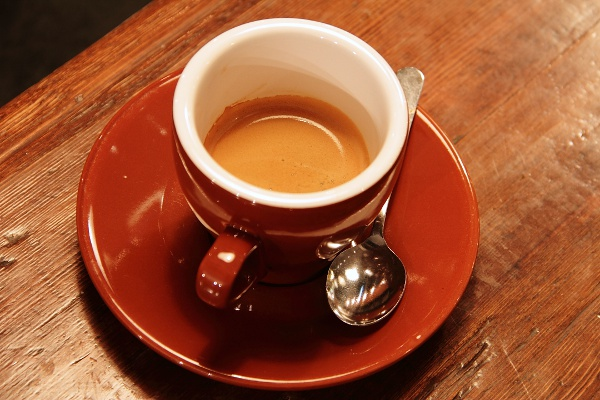

In [13]:
arr2img(i)

In [14]:
def edit_image(image, sigma=0.1, R=1.0, G=1.0, B=1.0):
    new_image = filters.gaussian(image, sigma=sigma, multichannel=True)
    new_image[:,:,0] = R*new_image[:,:,0]
    new_image[:,:,1] = G*new_image[:,:,1]
    new_image[:,:,2] = B*new_image[:,:,2]
    return arr2img(new_image)



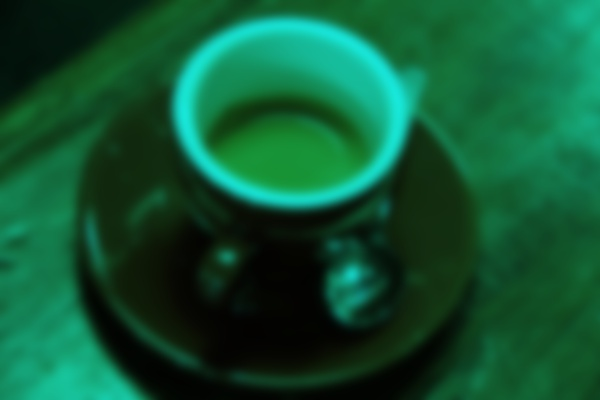

In [15]:
edit_image(i, sigma=5, R=0.1)

In [16]:
lims = (0.0,1.0,0.01)
interact(edit_image, image=fixed(i), sigma=(0.0,10.0,0.1), R=lims, G=lims, B=lims);

interactive(children=(FloatSlider(value=0.1, description='sigma', max=10.0), FloatSlider(value=1.0, descriptio…